In [1]:
import os

In [2]:
import tarfile

In [3]:
import urllib

In [4]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/master/"

In [5]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [6]:
DOWNLOAD_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz?raw=true"

In [7]:
def fetch_housing_data(download_url=DOWNLOAD_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

In [10]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(HOUSING_PATH, 'housing.csv')
    return pd.read_csv(csv_path)

In [11]:
housing = load_housing_data()

In [12]:
housing.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

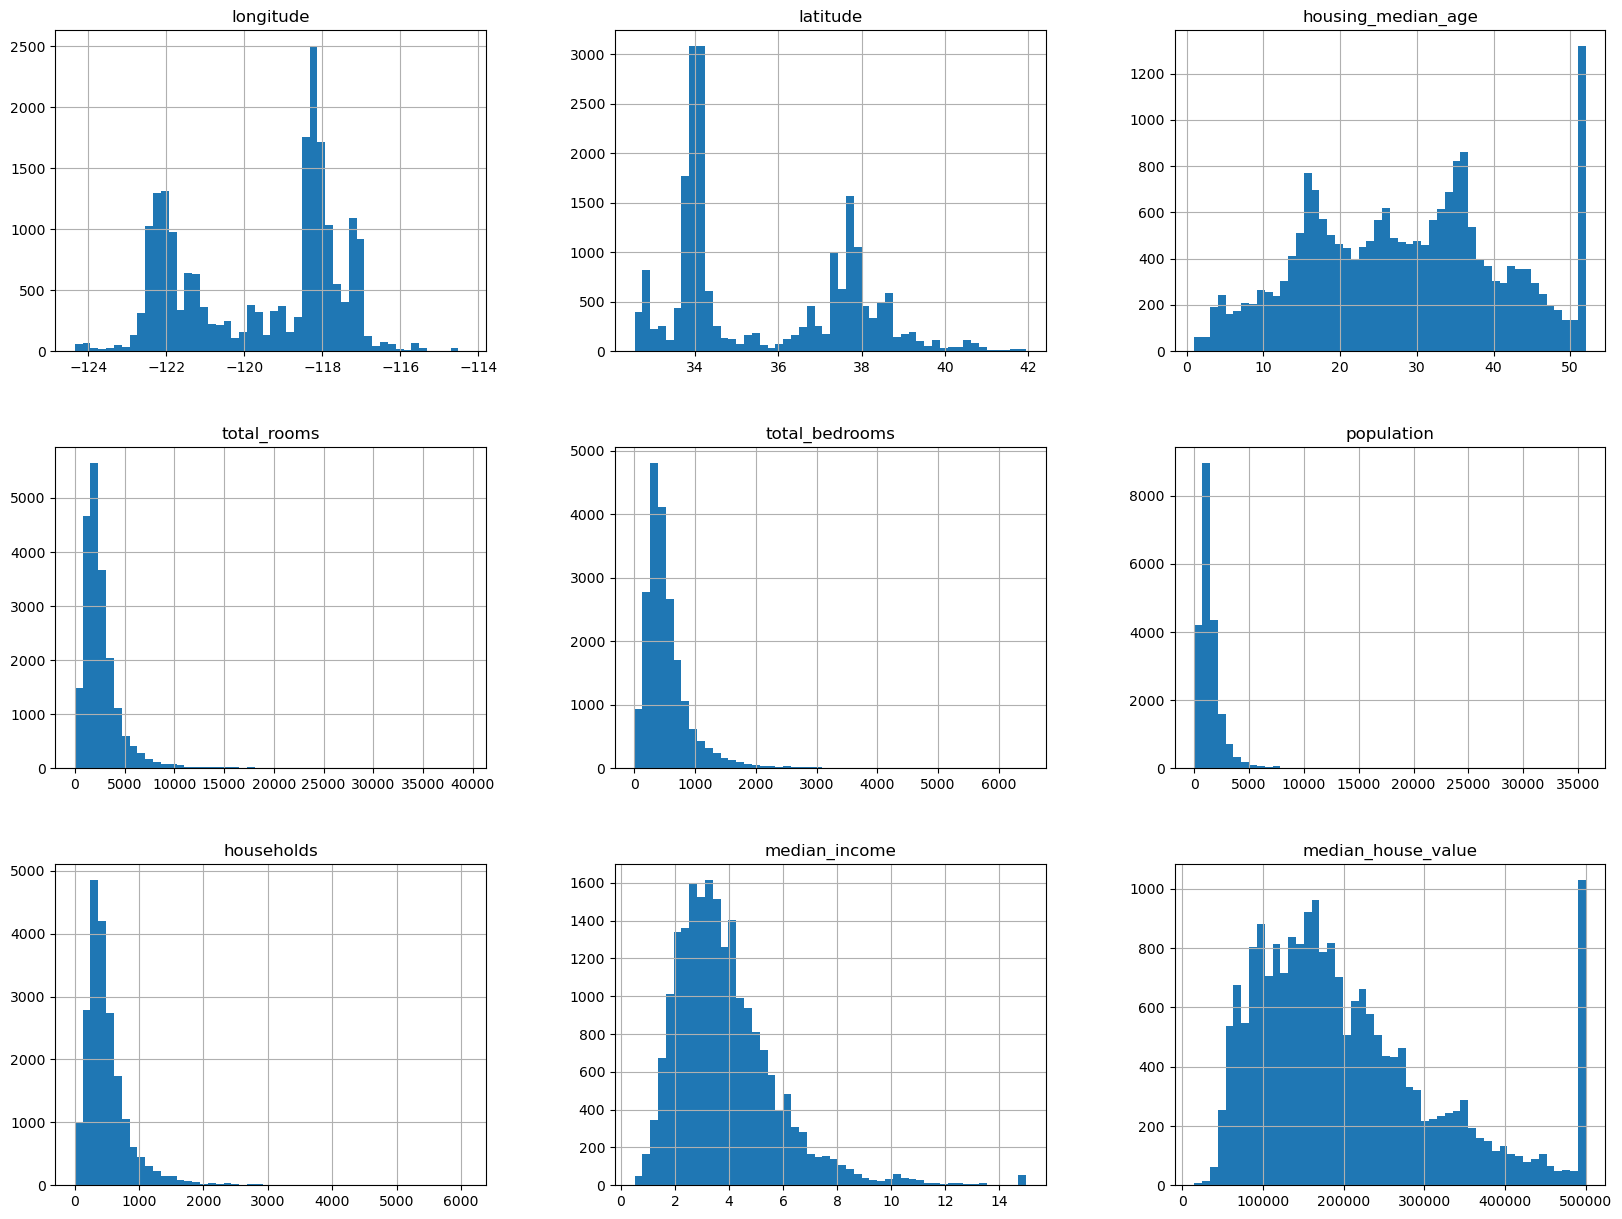

In [18]:
housing.hist(bins=50, figsize=(20,15))

# Splitting off a Test Set:

In [19]:
import numpy as np

#### Does not do well when dataset changes:

In [20]:
def split_train_set(data, test_ratio):
    shuffeled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffeled_indices[:test_set_size]
    train_indices = shuffeled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
# housing_with_id = housing.reset_index()

In [24]:
from zlib import crc32

#### Does better, but new data should be appended ONLY:

In [27]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xFFFFFFFF < test_ratio * 2**32

In [55]:
def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

#### Library that takes care of splitting off the test set:

In [63]:
from sklearn.model_selection import train_test_split

In [66]:
tain_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Stratified Sampling (INCOME):

 * Must have sufficient number of instances in each stratum
 * Not too many strata
 * Each stratum should be be large enough

In [70]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

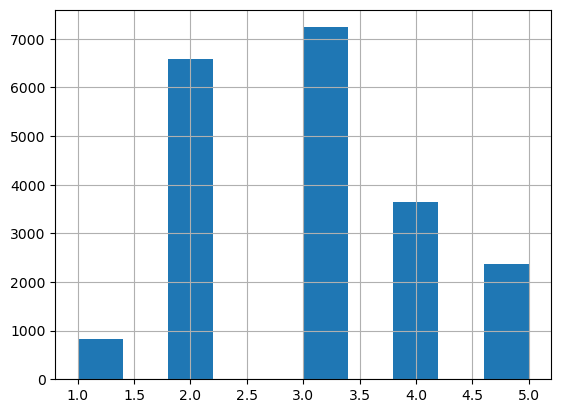

In [73]:
housing["income_cat"].hist()

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

In [75]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [78]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [82]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [83]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [87]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Data Visualization And Discovery

* Work with training set only - put test set aside
* If training set too large it's OK to take a subset (exploration set)

In [91]:
housing = strat_train_set.copy()

### Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

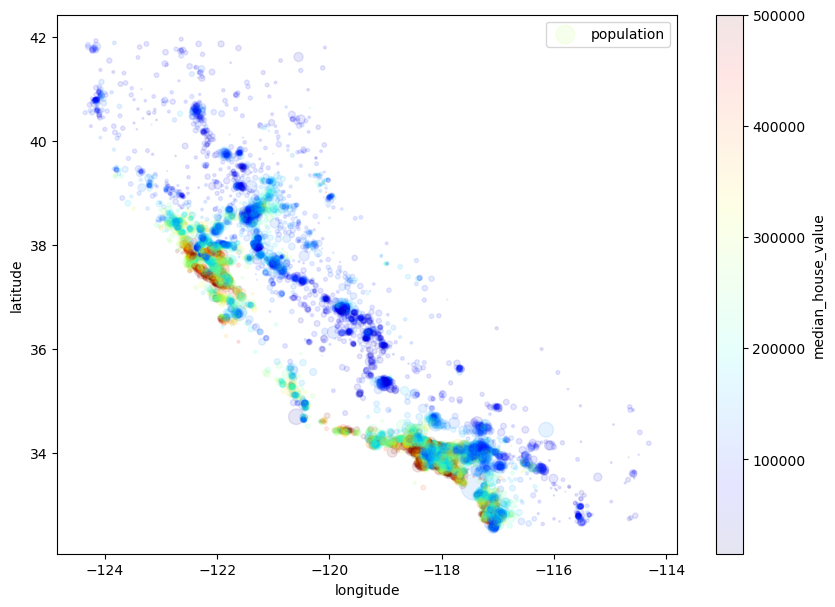

In [102]:
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             alpha=0.1, 
             s=housing["population"] / 100, 
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True
            )

#### Standard correlation cooficient:
 * This only checks linear correlation
 * Close to 1 - positively related
 * Close to -1 - nagitevly correlated
 * Close to 0 - not linearly correlated
 * There are different types of correlations that might exist wouldn't be shown here

In [105]:
corr_matrix = housing.corr()

In [108]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [110]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

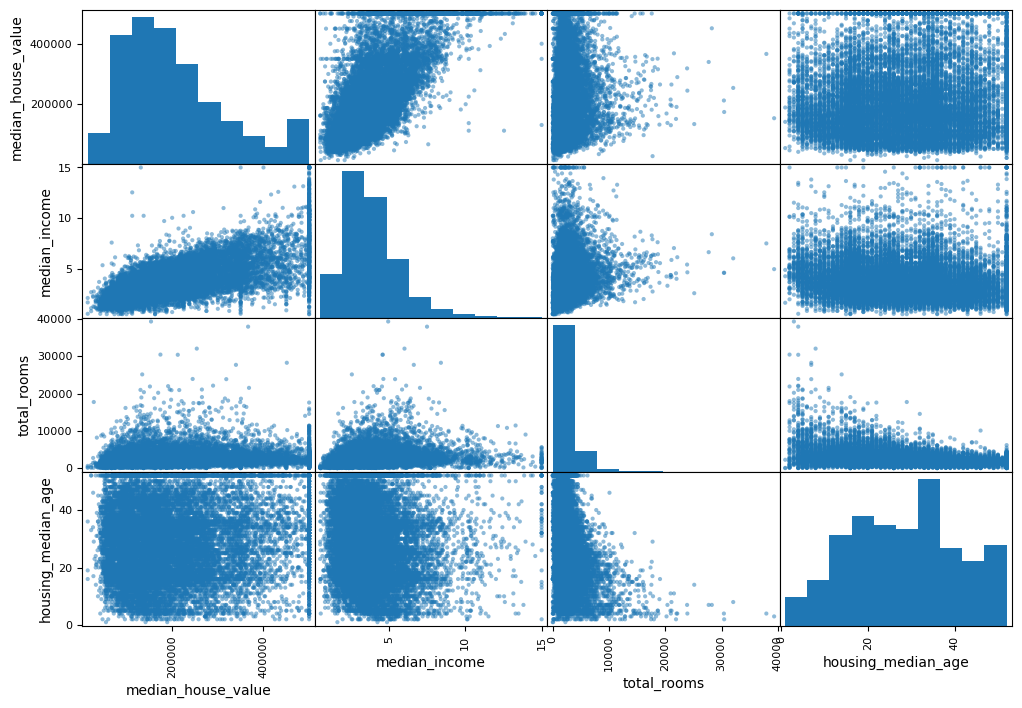

In [111]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

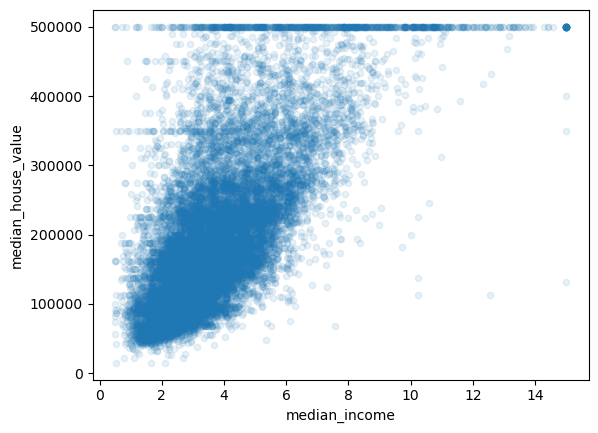

In [112]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [113]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

In [114]:
housing["bedrooms_per_room"] =  housing["total_bedrooms"] / housing["total_rooms"]

In [118]:
housing["population_per_household"] = housing["population"] / housing["households"]

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='bedrooms_per_room'>],
       [<AxesSubplo

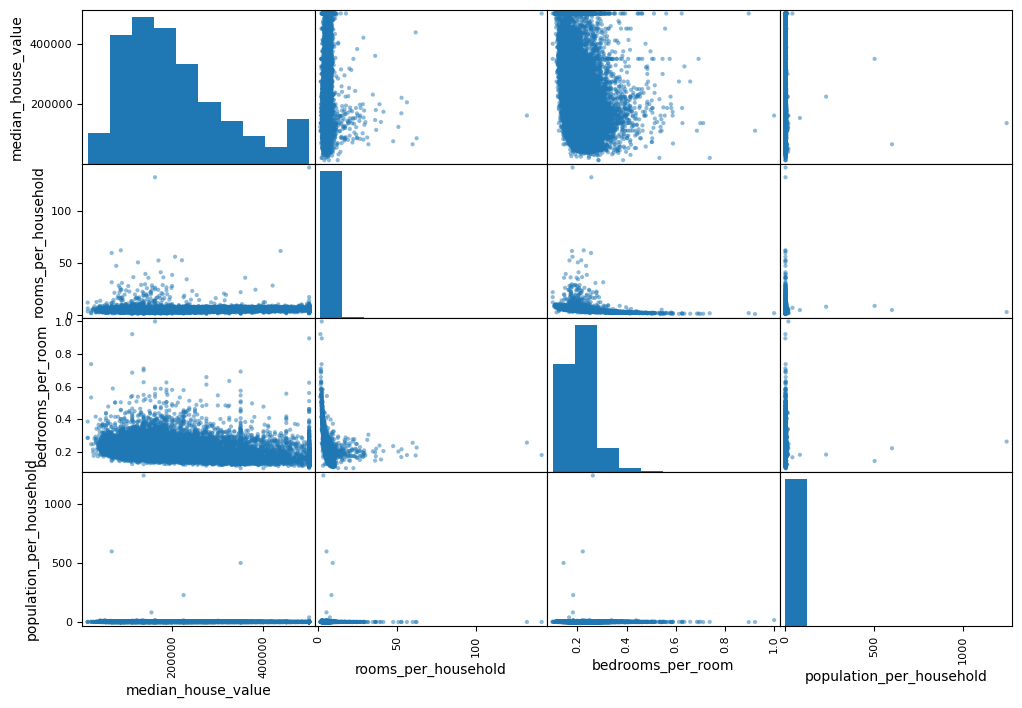

In [119]:
scatter_matrix(housing[["median_house_value", "rooms_per_household", "bedrooms_per_room", "population_per_household"]], figsize=(12,8))

In [127]:
corr_matrix = housing.corr()

In [128]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Data Preparation

In [129]:
housing = strat_train_set.drop("median_house_value", axis=1)

In [130]:
housing_labels = strat_train_set["median_house_value"].copy()

#### Missing features:
 * Get rid of rows with missing features
 * Get rid of the attribute
 * Set the attribute to some value (0, mean, median)

In [139]:
# housing.dropna(subset=["total_bedrooms"]) Option 1
# housing.drop("total_bedrooms", axis=1) Option 2
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inPlace=True) Option 3 

In [141]:
from sklearn.impute import SimpleImputer

In [142]:
imputer = SimpleImputer(strategy="median")

SimpleImputer deals with numericals only so we need to drop the ocean proximity

In [144]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [145]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [147]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [148]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [150]:
X = imputer.transform(housing_num)

In [152]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### Category parameters:
 * Converting categories to numerical values might be problematic.  Two numbers close by, might be seen as being similar.
 * One-hot encoding encodes categories as separate columns
 * large number of one-hot categories can cause performance issue.  Try to replace the category with something numeric (distance from ocean for example)

In [156]:
housing_cat = housing[["ocean_proximity"]]

In [160]:
from sklearn.preprocessing import OrdinalEncoder

In [161]:
ordinal_encoder = OrdinalEncoder()

In [164]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

##### OneHotEncoder: 

In [167]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
cat_encoder = OneHotEncoder()

In [170]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [171]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [172]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Feature Scaling:
 * StandardScaler from sklearn - not compatible with some learning algorithms, but good with outliers
 * MinMaxScaler from sklearn - sensitive to outliers

#### Custom Transformer:
 * Sometimes necessary if we can't find the right transformer for our data

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin

In [213]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [224]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
            
        

In [225]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [226]:
housing_extra_attributes = attr_adder.transform(housing.values)

 #### Pipelines: 
  * Allow to organize data cleanup into a pipline of defined steps
  * All steps but the last one HAVE to be transformers (fit_transform method)


In [174]:
from sklearn.pipeline import Pipeline

In [177]:
from sklearn.preprocessing import StandardScaler

In [229]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())   
])

In [235]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

##### Handling the category data with pipelines

In [236]:
from sklearn.compose import ColumnTransformer

In [237]:
num_attribs = list(housing_num)

In [240]:
cat_attribs = ["ocean_proximity"]

In [241]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [242]:
housing_prepared = full_pipeline.fit_transform(housing)

___
## Training the model:

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
lin_reg = LinearRegression()

In [246]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [247]:
some_data = housing.iloc[:5]

In [249]:
some_labels = housing_labels.iloc[:5]

In [250]:
some_data_prepared = full_pipeline.transform(some_data)

In [252]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [255]:
print("Labels :", list(some_labels))

Labels : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Measuring MRSE

In [257]:
from sklearn.metrics import mean_squared_error

In [258]:
housing_predictions = lin_reg.predict(housing_prepared)

In [259]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [261]:
lin_rmse = np.sqrt(lin_mse)

In [262]:
lin_rmse

68628.19819848922

The 68k is a lot of error, so we need to improve.  We have a problem of underfitting.  

Possible causes
 * features don't provide enough information to provide good prediction.
 * model not powerful enough
 
Fixes: 
 * use more powerful model
 * provide better features
 * reduce constraints on the model (doesn't apply here becuase model is not regularized)
    

#### Decision Tree Regressor

In [264]:
from sklearn.tree import DecisionTreeRegressor

In [265]:
tree_reg = DecisionTreeRegressor()

In [266]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [267]:
housing_predictions = tree_reg.predict(housing_prepared)

In [273]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [274]:
tree_rmse = np.sqrt(tree_mse)

In [276]:
tree_rmse

0.0

#### Splitting training set to allow better validation.

We could use `train_test_split()` and use one portion for training set and the other for validation set.  There is better alternative `Scikit-Learn's K-fold cross validation`.

`Scikit-Learn's K-fold cross validation` Splits set into X subsets called folds. Picks 1 fold for validation set and trains on X - 1 remaining folds.  This happens for each fold.

In [287]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [277]:
from sklearn.model_selection import cross_val_score

For the decision tree regression:

In [280]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [282]:
tree_rmse_scores = np.sqrt(-scores)

In [288]:
display_scores(tree_rmse_scores)

Scores:  [68438.13854439 66759.13274697 70474.68408631 70698.08339207
 70797.0390852  74473.76512725 71395.68350182 70554.89875023
 75385.71755194 69497.26101506]
Mean:  70847.44038012461
Standard Deviation:  2421.5308380727906


For linear regression:

In [289]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [292]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [293]:
display_scores(lin_rmse_scores)

Scores:  [66763.23996597 66967.53367374 70347.95244419 74750.5395116
 68031.13388938 71242.02685108 64962.15306646 68278.33926246
 71552.91566558 67665.10082067]
Mean:  69056.09351511225
Standard Deviation:  2740.0356328647586


Overfitting of the decision tree model is so bad that it matches the badness of underfitting the linear model.

#### Random Forest

In [294]:
from sklearn.ensemble import RandomForestRegressor

In [295]:
forest_reg = RandomForestRegressor()

In [296]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [302]:
forest_predictions = forest_reg.predict(housing_prepared)

In [303]:
forest_rmse = np.sqrt(mean_squared_error(housing_labels, forest_predictions))

In [304]:
forest_rmse

18655.974767935222

In [310]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [311]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [312]:
display_scores(forest_rmse_scores)

Scores:  [49698.21481674 47155.24132805 49336.25381278 52461.83288379
 49463.25710172 53196.89181125 48858.74138663 47817.34168929
 52999.52694147 49988.37605796]
Mean:  50097.5677829676
Standard Deviation:  2004.0381066435332


This is a little better, but there is still a lot of difference between training set and cross val scores.  Still overfitting.

In [314]:
import joblib

In [315]:
# joblib.dump(forest_reg, "housing_forest.pkl") Saves model

['housing_forest.pkl']

___
### Hyperparamter adjustment with GridSearch

In [318]:
from sklearn.model_selection import GridSearchCV

In [320]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [322]:
forest_reg = RandomForestRegressor()

In [325]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [326]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [327]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [328]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [402]:
cvres = grid_search.cv_results_

In [539]:
def score_details(cvres):
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)

In [540]:
score_details(cvres)

64749.62559909805 {'max_features': 2, 'n_estimators': 3}
55522.30542465864 {'max_features': 2, 'n_estimators': 10}
52976.12590664213 {'max_features': 2, 'n_estimators': 30}
59997.819177679245 {'max_features': 4, 'n_estimators': 3}
52855.19829528082 {'max_features': 4, 'n_estimators': 10}
50513.369499058324 {'max_features': 4, 'n_estimators': 30}
58897.96551911773 {'max_features': 6, 'n_estimators': 3}
52228.68609982444 {'max_features': 6, 'n_estimators': 10}
49955.98002939696 {'max_features': 6, 'n_estimators': 30}
58706.2832632186 {'max_features': 8, 'n_estimators': 3}
51715.541236454264 {'max_features': 8, 'n_estimators': 10}
49836.5441104365 {'max_features': 8, 'n_estimators': 30}
62791.876877434945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54563.48065065899 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60649.99893554308 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52580.042625092174 {'bootstrap': False, 'max_features': 3, 'n_estimators':

> Don’t forget that you can treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether or not to add a feature you
were not sure about (e.g., using the hyperparameter of your
transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more. 

#### TODO: HOW ? Look into this ^ 
#### TODO: Look into RandomizedSearchCV

___
### Analyzing Results


We can get some insights by analyzing the best models and their results.
Getting importance of different features in RandomForest:

In [335]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [336]:
feature_importances

array([6.72372537e-02, 5.94075151e-02, 4.38721067e-02, 1.59104483e-02,
       1.55273778e-02, 1.47312709e-02, 1.44151277e-02, 3.85377386e-01,
       5.86348121e-02, 1.12671768e-01, 4.47101530e-02, 5.47590058e-03,
       1.55637007e-01, 6.54475215e-05, 1.92402948e-03, 4.40239650e-03])

In [337]:
extra_attribs = ["room_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [343]:
cat_encoder = full_pipeline.named_transformers_["cat"]

In [352]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [357]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [361]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3853773861380101, 'median_income'),
 (0.15563700670044578, 'INLAND'),
 (0.1126717678053415, 'pop_per_hhold'),
 (0.06723725373408782, 'longitude'),
 (0.05940751510038913, 'latitude'),
 (0.058634812110124855, 'room_per_hhold'),
 (0.04471015298146974, 'bedrooms_per_room'),
 (0.043872106690579504, 'housing_median_age'),
 (0.015910448258840037, 'total_rooms'),
 (0.01552737781422323, 'total_bedrooms'),
 (0.01473127088142515, 'population'),
 (0.014415127692557506, 'households'),
 (0.005475900582445067, '<1H OCEAN'),
 (0.0044023965041615765, 'NEAR OCEAN'),
 (0.0019240294843691796, 'NEAR BAY'),
 (6.544752152992469e-05, 'ISLAND')]

___
### Evaluating on the test set

> Make sure not to use fit() on the transformers (no `fit_transform()`).  We already fitted the data in training set.  Thing like imputer calculating median, is done in the fit step, and we want to use that already calculated value.

In [362]:
final_model = grid_search.best_estimator_

In [366]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [367]:
Y_test = strat_test_set["median_house_value"].copy()

In [368]:
X_test_prepared = full_pipeline.transform(X_test)

In [369]:
final_predictions = final_model.predict(X_test_prepared)

In [370]:
final_mse = mean_squared_error(Y_test, final_predictions)

In [372]:
final_rmse = np.sqrt(final_mse)

In [373]:
final_rmse

48211.7368543644

#### Condifence interval

In [374]:
from scipy import stats

In [375]:
confidence = 0.95

In [377]:
squared_errors = (final_predictions - Y_test) ** 2

In [378]:
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46205.93317395, 50137.36012748])

#### TODO: What is this? how is this computed? ^

## Exercises:

#### 1. Using support vector machines for the housing problem.

In [381]:
from sklearn.svm import SVR

In [385]:
svr_reg = SVR()

In [397]:
svr_param_grid = [
    {"kernel" :["linear"], "C": [3, 30, 300, 3000]},
    {"kernel" :["rbf"], "C": [10, 100, 1000], "gamma": [0, 10, 100, 1000]}
]


In [398]:
svr_search = GridSearchCV(svr_reg, svr_param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True, verbose=2)

In [399]:
svr_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .................................C=3, kernel=linear; total time=  19.8s
[CV] END .................................C=3, kernel=linear; total time=  16.7s
[CV] END .................................C=3, kernel=linear; total time=  22.2s
[CV] END ................................C=30, kernel=linear; total time=  18.5s
[CV] END ................................C=30, kernel=linear; total time=  21.4s
[CV] END ................................C=30, kernel=linear; total time=  17.8s
[CV] END ...............................C=300, kernel=linear; total time=  17.7s
[CV] END ...............................C=300, kernel=linear; total time=  17.0s
[CV] END ...............................C=300, kernel=linear; total time=  20.2s
[CV] END ..............................C=3000, kernel=linear; total time=  21.1s
[CV] END ..............................C=3000, kernel=linear; total time=  19.1s
[CV] END ..............................C=3000, k

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [3, 30, 300, 3000], 'kernel': ['linear']},
                         {'C': [10, 100, 1000], 'gamma': [0, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [496]:
np.sqrt(-svr_search.best_score_)

70371.3553341072

#### 2. Replacing Grid search with Randomized Search

In [504]:
from scipy.stats import reciprocal, expon 
from sklearn.model_selection import RandomizedSearchCV

In [530]:
svr_param_grid1 = [{
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(13000, 100000),
    'gamma': expon(scale=1)
}]

In [531]:
rs_cv = RandomizedSearchCV(
    svr,
    svr_param_grid1,
    n_iter = 10,
    cv = 2,
    scoring="neg_mean_squared_error", 
    return_train_score=True,
    verbose=2
)

In [532]:
rs_cv_search = rs_cv.fit(housing_prepared, housing_labels)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END C=26588.756524582754, gamma=2.528115973658094, kernel=linear; total time=  16.3s
[CV] END C=26588.756524582754, gamma=2.528115973658094, kernel=linear; total time=  16.0s
[CV] END C=32784.036907856505, gamma=0.24298226063915618, kernel=rbf; total time=  23.0s
[CV] END C=32784.036907856505, gamma=0.24298226063915618, kernel=rbf; total time=  22.9s
[CV] END C=80432.9006885362, gamma=0.6391199478786582, kernel=rbf; total time=  33.4s
[CV] END C=80432.9006885362, gamma=0.6391199478786582, kernel=rbf; total time=  36.5s
[CV] END C=73210.46964941357, gamma=0.3969621579722896, kernel=linear; total time=  32.7s
[CV] END C=73210.46964941357, gamma=0.3969621579722896, kernel=linear; total time=  24.1s
[CV] END C=82721.08027060289, gamma=0.33048478266928666, kernel=linear; total time=  30.7s
[CV] END C=82721.08027060289, gamma=0.33048478266928666, kernel=linear; total time=  23.4s
[CV] END C=37410.3950459128, gamma=1.2281620043

In [533]:
np.sqrt(-rs_cv_search.best_score_)

58644.82393846479

In [541]:
score_details(rs_cv_search.cv_results_)

70456.79231519696 {'C': 26588.756524582754, 'gamma': 2.528115973658094, 'kernel': 'linear'}
58644.82393846479 {'C': 32784.036907856505, 'gamma': 0.24298226063915618, 'kernel': 'rbf'}
59462.364471788744 {'C': 80432.9006885362, 'gamma': 0.6391199478786582, 'kernel': 'rbf'}
70443.69713372707 {'C': 73210.46964941357, 'gamma': 0.3969621579722896, 'kernel': 'linear'}
70442.41501308417 {'C': 82721.08027060289, 'gamma': 0.33048478266928666, 'kernel': 'linear'}
70453.22859989107 {'C': 37410.3950459128, 'gamma': 1.2281620043380694, 'kernel': 'linear'}
81329.33671839586 {'C': 93896.35494591822, 'gamma': 3.041463359089462, 'kernel': 'rbf'}
70460.37856601049 {'C': 16189.274517091173, 'gamma': 1.307327764870272, 'kernel': 'linear'}
70459.27346107128 {'C': 19953.265882680847, 'gamma': 0.773678716180027, 'kernel': 'linear'}
59424.36995000342 {'C': 31284.6743955417, 'gamma': 0.3423402415932737, 'kernel': 'rbf'}


#### 3. Add transformer to select most important attributes

In [663]:
def top_k_indices(feature_importance, k):
    return np.sort(np.argpartition(feature_importance, -k)[-k:])


In [658]:
class TopFeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k):
        self.feature_importance = feature_importance
        self.k = k        
    def fit(self, X, y=None):
        self.top_indices_ = top_k_indices(feature_importance, k)
    def transform(self, X, y=None):
        return X[:,self.top_indices_]
        

In [661]:
k = 5

In [664]:
top_k_feature_indices = top_k_indices(feature_importances, k)

In [665]:
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [666]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')